In [3]:
# Import Libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
# Import the Excel file
df = pd.read_excel('Data/resistance_dataset.xlsx')
df.rename({'2F5 Resistance Binary outcom' : 'Binary'}, axis=1, inplace=True)

In [5]:
# Print the first 3 rows
df.head(3)

,Virus name,Binary,1,2,3,4,5,6,7,8,...,847,848,849,850,851,852,853,854,855,856
0,09GX286,1,M,R,V,R,E,N,W,P,...,I,R,Q,G,L,E,R,A,L,Q
1,15JS102,1,M,R,V,K,G,N,W,P,...,I,R,Q,G,L,E,R,A,L,L
2,15JS48,1,M,R,V,K,E,N,W,P,...,I,R,Q,G,F,E,R,A,L,Q


In [6]:
sequence_positions = np.arange(1, 857)

In [7]:
mode_values = df[sequence_positions].mode().iloc[0]

for column in sequence_positions:
    df[column].replace('-', mode_values[column], inplace=True)

In [8]:
null_columns = mode_values[mode_values == '-'].index.to_list()

df.drop(columns=null_columns, inplace=True)

In [9]:
model_df = df.copy()
model_df.drop('Virus name', axis=1, inplace=True)

categorical_columns = list(set(sequence_positions) - set(null_columns))

# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    model_df[column] = le.fit_transform(model_df[column])
    label_encoders[column] = le

# Splitting the data into features (X) and target (y)
X = model_df.drop('Binary', axis=1)
y = model_df['Binary']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [10]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9625


In [14]:
model.feature_importances_.argmax()

770

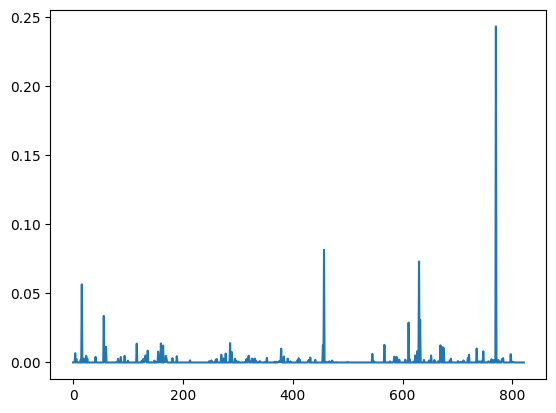

In [11]:
plt.plot(model.feature_importances_)
plt.show()